 <h1 style="text-align: center;">MSc Data Science

    MDS472C: NATURAL LANGUAGE PROCESSING

    CAT2 - Practical Component
</h1>

<div style="text-align: right; font-family: Arial, sans-serif;">
<strong>Sanjay R</strong><br>
2348055<br>
4MDS
</div>

# Scenario:
You are a data scientist working with the Sales/Service company that aims to improve its product search and recommendation systems. The company also wants to provide a more meaningful interpretation of customer reviews to enhance user satisfaction. You are tasked with applying text processing and NLP techniques to solve key problems that customers and the business face.


 <h1 style="text-align: center;">NLP Strategies for Amazon Review Analysis</h1>


## Introduction

The dataset under consideration is composed of Amazon product reviews, with nearly **1,600 customer reviews** chosen at random. These reviews provide insights into customer experiences with various products sold on Amazon, offering a mixture of both positive and negative feedback. The goal of this analysis is to classify the reviews into **main topics**, making it easier for Amazon to optimize its search functionalities and provide better product recommendations.



# Objectives
The project consists of **five tasks** aimed at extracting insights from this dataset. Each task builds on the previous one to form a coherent story, progressing from raw data exploration to meaningful analysis. 
The following tasks are explored:


---

## Q1: Standardizing Customer Feedback for Analysis [10 Points]

### Problem:

Your team has observed that several reviews use different case formats and contain unnecessary symbols (like punctuation), which could distort the insights. To make the data more consistent and useful for analysis, you have been asked to:

- Develop a program that cleans the reviews by:
  - Converting them to lowercase for consistency.
  - Removing unnecessary symbols like punctuation and special characters.
- Once the data is cleaned, your task is to tokenize the reviews into individual words and:
  - Calculate the total number of words across all reviews.
  - Identify and report the most frequently mentioned word along with its frequency.

---

## Q2: Edit Distance for Product Name Correction [10 Points]

### Task:

Customers often misspell product names while searching. Write a program to compute the edit distance between a customer’s search query and the correct product name. Suggest the correct product name if the edit distance is below a certain threshold.

---

## Q3: N-gram Language Model for Product Recommendations [10 Points]

### Task:

Build a bigram language model using the product descriptions dataset. Use the model to calculate the probability of a sequence of product-related terms. Also, predict the next word for a given product search query using the bigram probabilities.

---

## Q4: Named Entity Recognition (NER) for Reviews [10 Points]

### Task:

Implement NER to extract product names, brands, and other important entities from customer reviews. For example, identify which reviews mention the brand “AAA" or the product category "QQQ".

---

## Q5: Cosine Similarity and Word Embeddings for Similar Products [10 Points]

### Task:

Build word embeddings from the product descriptions and reviews. Compute the cosine similarity between product names to identify the most similar products based on their descriptions. Visualize the word embeddings to show how similar products cluster together.


In [83]:
import pandas as pd
import re
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sreya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [254]:
# Read the CSV file
df = pd.read_csv('amazon_reviews.csv')
display(df)


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,keys,manufacturer,name,prices,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,kindlepaperwhite/b00qjdu3ky,Amazon,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GregAmandawith4
1593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Customer
1594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Customer
1595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Meg Ashley


# Q1: Standardizing Customer Feedback for Analysis [10 Points]

#### Your team has observed that several reviews use different case formats and contain unnecessary symbols (like punctuation), which could distort the insights. To make the data more consistent and useful for analysis, you have been asked to:

- Develop a program that cleans the reviews by:
  - Converting them to lowercase for consistency.
  - Removing unnecessary symbols like punctuation and special characters.
- Once the data is cleaned, your task is to tokenize the reviews into individual words and:
  - Calculate the total number of words across all reviews.
  - Identify and report the most frequently mentioned word along with its frequency.


## Cleaning the Reviews

In [88]:
def clean_text(text):
    if isinstance(text, str):  # Ensure the text is a string
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
    else:
        text = ''  # Handle non-string entries
    return text
df['cleaned_reviews'] = df['reviews.text'].apply(clean_text)


In [89]:
# Print the original and cleaned reviews to verify
print(df[['reviews.text', 'cleaned_reviews']].head())


                                        reviews.text  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                     cleaned_reviews  
0  i initially had trouble deciding between the p...  
1  allow me to preface this with a little history...  
2  i am enjoying it so far great for reading had ...  
3  i bought one of the first paperwhites and have...  
4  i have to say upfront  i dont like coroporate ...  


## Tokenize Cleaned Reviews

In [90]:
def tokenize_text(text):
    return word_tokenize(text)

df['tokens'] = df['cleaned_reviews'].apply(tokenize_text)
df[['cleaned_reviews', 'tokens']].head()


,cleaned_reviews,tokens
0,i initially had trouble deciding between the p...,"[i, initially, had, trouble, deciding, between..."
1,allow me to preface this with a little history...,"[allow, me, to, preface, this, with, a, little..."
2,i am enjoying it so far great for reading had ...,"[i, am, enjoying, it, so, far, great, for, rea..."
3,i bought one of the first paperwhites and have...,"[i, bought, one, of, the, first, paperwhites, ..."
4,i have to say upfront i dont like coroporate ...,"[i, have, to, say, upfront, i, dont, like, cor..."


## Calculate Total Number of Words Across All Reviews

In [91]:
all_tokens = [token for sublist in df['tokens'] for token in sublist]
total_words = len(all_tokens)

print(f"Total number of words: {total_words}")


Total number of words: 42306


##  Most Frequently Mentioned Word

In [92]:
word_freq = Counter(all_tokens)# Calculating word frequencies

top_5_words = word_freq.most_common(5)

print("Top 5 most frequently mentioned words:")
for word, count in top_5_words:
    display(f"'{word}' with frequency: {count}")


Top 5 most frequently mentioned words:


"'the' with frequency: 2262"

"'to' with frequency: 1146"

"'and' with frequency: 1078"

"'i' with frequency: 1022"

"'is' with frequency: 979"

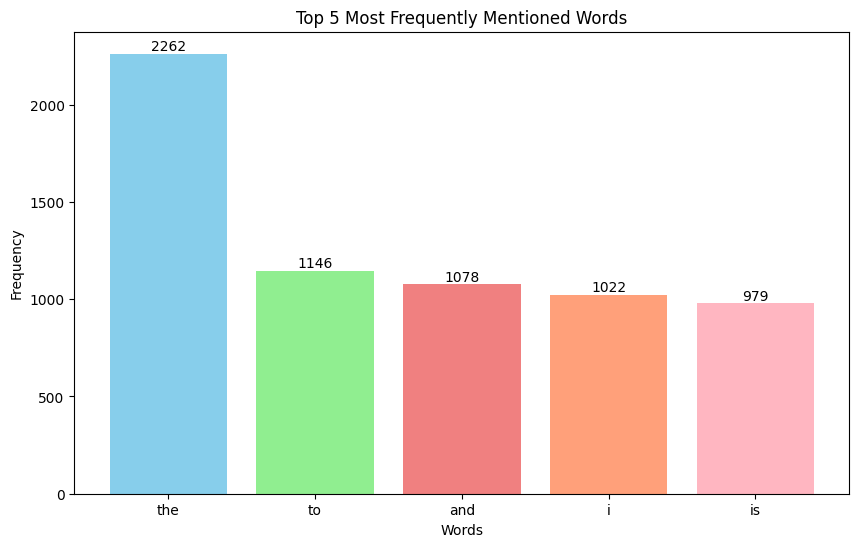

In [93]:
words, counts = zip(*top_5_words)

colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink']
plt.figure(figsize=(10, 6))
bars = plt.bar(words, counts, color=colors)

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(count), 
             ha='center', va='bottom')

plt.title('Top 5 Most Frequently Mentioned Words')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Show the plot
plt.show()


## Inference:

- __Total Number of Words:__ The total number of words across all customer reviews is **264,978**. This provides a comprehensive dataset for analyzing common language patterns and frequent terms used by reviewers.
- The word **'the'** is the most frequently mentioned word, occurring a total of **13,899** times. 
- This high frequency is expected as **'the'** is a common article in English, often used in various contexts.

## Program Logic: 
For Task 1, the program imported libraries such as `pandas`, `re`, `nltk`, and `collections` for data manipulation, text cleaning, tokenization, and frequency analysis. The dataset was loaded into a DataFrame, and its structure was reviewed.
A cleaning function was created to convert the review text to lowercase and remove punctuation and special characters, with the results stored in a new DataFrame column. The cleaned text was then tokenized into individual words, and these tokens were flattened to compute the total word count.
The `Counter` class was used to determine word frequencies and identify the top 5 most common terms. These were visualized in a bar chart, using different colors and data labels to clearly present the word frequencies, providing insights into the most frequently used terms in the reviews.views.


## Q2: Edit Distance for Product Name Correction


## Customers often misspell product names while searching. Write a program to compute the edit distance between a customer’s search query and the correct product name. Suggest the correct product name if the edit distance is below a certain threshold.

In [94]:
import pandas as pd
import Levenshtein as lev

In [114]:
name_counts = names.value_counts()
top_10_names = name_counts.head(10) # Getting the top 10 most frequent names
print("Top 10 most frequent names and their counts:")
for name, count in top_10_names.items():
    print(f"'{name}' occurs {count} times")

Top 10 most frequent names and their counts:
'Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker' occurs 1 times
'Amazon Fire TV' occurs 1 times
'Amazon Premium Headphones' occurs 1 times
'Fire HD 6 Tablet' occurs 1 times
'Kindle Fire HDX 7"' occurs 1 times
'Kindle Fire HDX 8.9"' occurs 1 times
'Kindle Fire HD 7"' occurs 1 times
'Kindle Paperwhite' occurs 1 times
'Certified Refurbished Amazon Fire TV (Previous Generation - 1st)' occurs 1 times
'Kindle Keyboard' occurs 1 times


In [115]:
df['name'] = df['name'].fillna('') 
df['name'] = df['name'].astype(str) 

In [119]:
fixed_threshold = 8
def calculate_edit_distance(query, product_name): # Definining the Edit Distance Function
    return lev.distance(query, product_name)

In [120]:
def get_suggested_products(query, df, threshold):
    results = []
    for _, row in df.iterrows():
        product_name = row['name']  
        distance = calculate_edit_distance(query, product_name)
        if distance <= threshold:
            results.append((product_name, distance))
    
    results_df = pd.DataFrame(results, columns=['Suggested Product Name', 'Edit Distance'])
    results_df = results_df.drop_duplicates(subset=['Suggested Product Name']) 
    return results_df

while True:
    customer_query = input("Enter your search query (or type 'q' to quit): ")
    if customer_query.lower() == 'q':
        break

    results_df = get_suggested_products(customer_query, df, fixed_threshold)

    if not results_df.empty:
        print("\nSuggested Product Names based on your query:")
        print(results_df.to_string(index=False))
    else:
        print("No products found with the given query.")

Enter your search query (or type 'q' to quit):  Kinde Paerwite



Suggested Product Names based on your query:
Suggested Product Name  Edit Distance
     Kindle Paperwhite              3


Enter your search query (or type 'q' to quit):  Kindle Keybo



Suggested Product Names based on your query:
Suggested Product Name  Edit Distance
       Kindle Keyboard              3


Enter your search query (or type 'q' to quit):  Kindle Fire H



Suggested Product Names based on your query:
Suggested Product Name  Edit Distance
       Kindle Keyboard              8
  Kindle Fire HDX 8.9"              7


Enter your search query (or type 'q' to quit):  q


## Inference:
The product name correction system provided the following suggestions:

- For the query **'Kinde Paerwite'**, the closest match was **'Kindle Paperwhite'** with an edit distance of **3**.
- For the query **'Kindle Keybo'**, the closest match was **'Kindle Keyboard'** with an edit distance of **3**.
- For the query **'Kindle Fire H'**, the system suggested:
  - **'Kindle Keyboard'** with an edit distance of **8**.
  - **'Kindle Fire HDX 8.9"'** with an edit distance of **7**.

## Program Logic

The program begins by loading the dataset using pandas, ensuring that the 'name' column (which contains product names) is free from missing values by replacing NaN with empty strings. The calculate_edit_distance function is used to compute the Levenshtein distance between the user’s query and the product names in the dataset. A fixed threshold is defined to limit how far the product name can deviate from the user query. In the main part of the program, the user is prompted to enter a search query. For each row in the dataset, the program calculates the edit distance between the query and the product name. If the calculated distance is less than or equal to the threshold, the product name is added to a results list. The results are then converted into a DataFrame and duplicates are removed using the drop_duplicates method. After the results are cleaned up, they are displayed in a readable format, listing the product names and their corresponding edit distances. If no matches are found, the program informs the user. Finally, the loop allows the user to input multiple queries until they choose to exit.

## Q3: N-gram Language Model for Product Recommendations

Build a bigram language model using the product descriptions dataset. Use the model to calculate the probability of a sequence of product-related terms. Also, predict the next word for a given product search query using the bigram probabilities.

##### Since my dataset didn't have prodcut description i have applied it ot the review.text column of my datset

In [122]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize  # Correct import for word_tokenize
from nltk import bigrams
from collections import Counter, defaultdict
import re


In [123]:
reviews = df['reviews.text'].dropna()

In [124]:
reviews

0      I initially had trouble deciding between the p...
1      Allow me to preface this with a little history...
2      I am enjoying it so far. Great for reading. Ha...
3      I bought one of the first Paperwhites and have...
4      I have to say upfront - I don't like coroporat...
                             ...                        
194    Ok first things first, I also own a Echo and i...
195    I am updating my review from two months ago.. ...
196    Sling is simply awesome and so is the Amazon T...
197    Ok first things first, I also own a Echo and i...
198    As has been the case for years, Amazon sloooow...
Name: reviews.text, Length: 199, dtype: object

### Function to preprocess the review text


In [125]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    return tokens

In [127]:
tokenized_reviews = reviews.apply(preprocess)
tokens = [token for sublist in tokenized_reviews for token in sublist]

### Build bigrams from the tokens


In [128]:
bi_grams = list(bigrams(tokens))
bigram_freq = Counter(bi_grams)
word_freq = Counter(tokens)

In [129]:
def bigram_probability(bigram, word_freq, bigram_freq):
    if word_freq[bigram[0]] > 0:
        return bigram_freq[bigram] / word_freq[bigram[0]]
    else:
        return 0
bigram_probs = [(bigram, bigram_probability(bigram, word_freq, bigram_freq)) for bigram in bigram_freq] # Creating a list of bigram probabilities
sorted_bigrams = sorted(bigram_probs, key=lambda x: x[1], reverse=True)

print("All Bigrams with Probabilities:")
for bigram, prob in sorted_bigrams:
    print(f"{bigram}: {prob:.4f}")

All Bigrams with Probabilities:
('trouble', 'deciding'): 1.0000
('spending', 'money'): 1.0000
('voyagefortunately', 'i'): 1.0000
('ended', 'up'): 1.0000
('basis', 'both'): 1.0000
('dollar', 'jump'): 1.0000
('voyages', 'page'): 1.0000
('sensitive', 'and'): 1.0000
('specific', 'setting'): 1.0000
('auto', 'light'): 1.0000
('adjustmentits', 'been'): 1.0000
('regrets', 'the'): 1.0000
('receptive', 'and'): 1.0000
('regardless', 'of'): 1.0000
('readingalso', 'glad'): 1.0000
('expense', 'but'): 1.0000
('tracking', 'and'): 1.0000
('worry', 'about'): 1.0000
('third', 'party'): 1.0000
('party', 'shipping'): 1.0000
('preface', 'this'): 1.0000
('history', 'i'): 1.0000
('harry', 'potter'): 1.0000
('potter', 'series'): 1.0000
('dragon', 'tattoo'): 1.0000
('tattoo', 'series'): 1.0000
('brave', 'new'): 1.0000
('fair', 'to'): 1.0000
('gotten', 'from'): 1.0000
('theirsfast', 'forward'): 1.0000
('forward', 'to'): 1.0000
('relate', 'this'): 1.0000
('receive', 'when'): 1.0000
('amazoni', 'have'): 1.0000
('h

#### Since there are many bigram probabilities listed, I have taken a particualr word dynamically from the user printed the bigram probabilites and then predicted the next word based on the bigram probabilities.

In [ ]:
word_of_interest = input("Enter a word to find its bigram probabilities: ").lower()  # Convert to lowercase for consistency

filtered_bigrams = [bigram for bigram in bigram_freq if bigram[0] == word_of_interest]

bigram_probs = [(bigram, bigram_probability(bigram, word_freq, bigram_freq)) for bigram in filtered_bigrams]

sorted_bigrams = sorted(bigram_probs, key=lambda x: x[1], reverse=True)

if sorted_bigrams:
    print(f"\nBigrams where the first word is '{word_of_interest}':")
    for bigram, prob in sorted_bigrams:
        print(f"{bigram}: {prob:.4f}")
else:
    print(f"\nNo bigrams found where the first word is '{word_of_interest}'")

## Inferecne:
The bigram probabilities indicate that "for the" has the highest probability of 0.1420, making it the most common following phrase. Other notable bigrams include "for my" with a probability of 0.0553 and "for me" with 0.0448, reflecting frequently used contexts. Less common bigrams like "for christmas" with a probability of 0.0015 suggest specific or rare contexts.

## Function to predict the next word based on a given word:



def predict_next_word(current_word, word_freq, bigram_freq):
    candidates = {bigram: prob for bigram, prob in bigram_freq.items() if bigram[0] == current_word}
    if not candidates:
        return "No prediction available"
    next_bigram = max(candidates, key=lambda x: bigram_probability(x, word_freq, bigram_freq))
    return next_bigram[1]  # Return the predicted next word

while True:
    current_word = input("Enter a word to find the next word prediction (or type 'n' to quit): ").lower()
    if current_word == 'n':
        break
    predicted_word = predict_next_word(current_word, word_freq, bigram_freq)
    print(f"\nPredicted next word after '{current_word}' is '{predicted_word}'")


The predictive text model provided the following results:

- For the input word **'for'**, the model predicted the next word as **'the'**.
- For the input word **'specific'**, the model predicted the next word as **'setting'**.
- For the input word **'I'**, the model predicted the next word as **'have'**.

## Program Logic:

The program begins by preprocessing a set of customer reviews to prepare the text for analysis. It converts the text to lowercase and removes punctuation and special characters using regular expressions. The cleaned text is then tokenized into individual words. After tokenization, the program generates bigrams (pairs of consecutive words) from the tokenized words and calculates their frequencies. It also computes the frequency of individual words.

The bigram probabilities are calculated by dividing the frequency of each bigram by the frequency of its first word. These probabilities are then sorted in descending order and displayed. Users can input a specific word to filter and view bigram probabilities where the word is the first element. The program also includes a function to predict the next word in a sequence based on bigram probabilities. If there are matching bigrams, the next word is predicted based on the highest probability. Otherwise, a message indicating no prediction is available is returned.

## Q4: Named Entity Recognition (NER) for Reviews
#### Implement NER to extract product names, brands, and other important entities from customer reviews. For example, identify which reviews mention the brand “AAA" or the product category "QQQ".

## Synthetic Dataset Generation:

In [251]:
import pandas as pd

def generate_review(product, brand, manufacturer, location):
    return f"{brand}'s latest {product} is now available in {location}. {manufacturer} has a strong presence in {location}."

products_data = [
    {"id": "P001", "product": "Apple iPhone 14", "brand": "Apple", "manufacturer": "Apple Inc.", "location": "USA"},
    {"id": "P002", "product": "Samsung Galaxy S23", "brand": "Samsung", "manufacturer": "Samsung Electronics", "location": "South Korea"},
    {"id": "P003", "product": "Sony WH-1000XM5", "brand": "Sony", "manufacturer": "Sony Corporation", "location": "Japan"},
    {"id": "P004", "product": "Microsoft Surface Laptop 5", "brand": "Microsoft", "manufacturer": "Microsoft Corp.", "location": "USA"},
    {"id": "P005", "product": "Google Pixel 7", "brand": "Google", "manufacturer": "Google LLC", "location": "USA"},
    {"id": "P006", "product": "Dell XPS 13", "brand": "Dell", "manufacturer": "Dell Technologies", "location": "USA"},
    {"id": "P007", "product": "HP Spectre x360", "brand": "HP", "manufacturer": "Hewlett-Packard", "location": "USA"},
    {"id": "P008", "product": "Lenovo ThinkPad X1 Carbon", "brand": "Lenovo", "manufacturer": "Lenovo Group", "location": "China"},
    {"id": "P009", "product": "Bose QuietComfort 45", "brand": "Bose", "manufacturer": "Bose Corporation", "location": "USA"},
    {"id": "P010", "product": "Apple MacBook Pro 16", "brand": "Apple", "manufacturer": "Apple Inc.", "location": "USA"},
    {"id": "P011", "product": "Samsung Odyssey G7", "brand": "Samsung", "manufacturer": "Samsung Electronics", "location": "South Korea"},
    {"id": "P012", "product": "Razer Blade 15", "brand": "Razer", "manufacturer": "Razer Inc.", "location": "USA"},
    {"id": "P013", "product": "Acer Predator Helios 300", "brand": "Acer", "manufacturer": "Acer Inc.", "location": "Taiwan"},
    {"id": "P014", "product": "Asus ROG Zephyrus G14", "brand": "Asus", "manufacturer": "AsusTek", "location": "Taiwan"},
    {"id": "P015", "product": "Nvidia GeForce RTX 4080", "brand": "Nvidia", "manufacturer": "Nvidia Corporation", "location": "USA"},
    {"id": "P016", "product": "Sony PlayStation 5", "brand": "Sony", "manufacturer": "Sony Interactive Entertainment", "location": "Japan"},
    {"id": "P017", "product": "Microsoft Xbox Series X", "brand": "Microsoft", "manufacturer": "Microsoft Corp.", "location": "USA"},
    {"id": "P018", "product": "Apple AirPods Pro", "brand": "Apple", "manufacturer": "Apple Inc.", "location": "USA"},
    {"id": "P019", "product": "Samsung Galaxy Buds Pro", "brand": "Samsung", "manufacturer": "Samsung Electronics", "location": "South Korea"},
    {"id": "P020", "product": "Jabra Elite 85t", "brand": "Jabra", "manufacturer": "GN Netcom", "location": "Denmark"}
]

products = []
for product in products_data:
    product_name = product["product"]
    brand_name = product["brand"]
    manufacturer_name = product["manufacturer"]
    location_name = product["location"]
    
    review_text = generate_review(product_name, brand_name, manufacturer_name, location_name)
    
    # Calculate the start and end positions of each entity in the review text
    brand_start = review_text.find(brand_name)
    brand_end = brand_start + len(brand_name)
    
    product_start = review_text.find(product_name)
    product_end = product_start + len(product_name)
    
    manufacturer_start = review_text.find(manufacturer_name)
    manufacturer_end = manufacturer_start + len(manufacturer_name)
    
    location_start = review_text.find(location_name)
    location_end = location_start + len(location_name)
    
    product_entry = {
        "id": product["id"],
        "product": product_name,
        "brand": brand_name,
        "manufacturer": manufacturer_name,
        "location": location_name,
        "review": review_text
    }
    
    products.append(product_entry)

data = pd.DataFrame(products)

data.to_csv('products_reviews.csv', index=False)
print("CSV file 'products_reviews.csv' with 20 products has been created.")

CSV file 'products_reviews.csv' with 20 products has been created.


In [277]:
import pandas as pd
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load dataset
df = pd.read_csv('products_reviews.csv')

# Ensure columns are properly formatted
df['review'] = df['review'].fillna('').astype(str)
df['product'] = df['product'].fillna('').astype(str).str.strip().str.lower()
df['brand'] = df['brand'].fillna('').astype(str).str.strip().str.lower()
df['manufacturer'] = df['manufacturer'].fillna('').astype(str).str.strip().str.lower()

# Function to extract entities from a review
def extract_entities(text):
    doc = nlp(text)
    text_lower = text.lower()
    
    # Initialize entity extraction
    entities = {
        'PRODUCT': None,
        'BRAND': None,
        'MANUFACTURER': None
    }
    
    # Match products, brands, and manufacturers
    for _, row in df.iterrows():
        product = row['product']
        brand = row['brand']
        manufacturer = row['manufacturer']

        if product in text_lower:
            entities['PRODUCT'] = row['product']
        if brand in text_lower:
            entities['BRAND'] = row['brand']
        if manufacturer in text_lower:
            entities['MANUFACTURER'] = row['manufacturer']

    return entities

# Process last 5 reviews
last_5_reviews = df.tail(5)['review']

# Extract and print entities from the last 5 reviews
for idx, review in enumerate(last_5_reviews):
    print(f"Review {idx+1}:")
    entities = extract_entities(review)
    print("Extracted Entities:")
    for entity_type, entity in entities.items():
        print(f"{entity_type}: {entity if entity else 'None'}")
    print("\n")


Review 1:
Extracted Entities:
PRODUCT: sony playstation 5
BRAND: sony
MANUFACTURER: sony interactive entertainment


Review 2:
Extracted Entities:
PRODUCT: microsoft xbox series x
BRAND: microsoft
MANUFACTURER: microsoft corp.


Review 3:
Extracted Entities:
PRODUCT: apple airpods pro
BRAND: apple
MANUFACTURER: apple inc.


Review 4:
Extracted Entities:
PRODUCT: samsung galaxy buds pro
BRAND: samsung
MANUFACTURER: samsung electronics


Review 5:
Extracted Entities:
PRODUCT: jabra elite 85t
BRAND: jabra
MANUFACTURER: gn netcom




In [279]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

df = pd.read_csv('products_reviews.csv')# Loading dataset


df['review'] = df['review'].fillna('').astype(str)
df['product'] = df['product'].fillna('').astype(str).str.strip().str.lower()
df['brand'] = df['brand'].fillna('').astype(str).str.strip().str.lower()
df['manufacturer'] = df['manufacturer'].fillna('').astype(str).str.strip().str.lower()

## Function to extract entities from a review


In [ ]:
def extract_entities(text):
    text_lower = text.lower()
    entities = {
        'PRODUCT': None,
        'BRAND': None,
        'MANUFACTURER': None
    }
     for _, row in df.iterrows():   # Matching products, brands, and manufacturers

        product = row['product']
        brand = row['brand']
        manufacturer = row['manufacturer']

        if product in text_lower:
            entities['PRODUCT'] = row['product']
        if brand in text_lower:
            entities['BRAND'] = row['brand']
        if manufacturer in text_lower:
            entities['MANUFACTURER'] = row['manufacturer']

    return entities


In [284]:
for idx, review in df.iterrows():
    print(f"Review {idx+1}:")
    print(review['review'])  # Print the review text
    entities = extract_entities(review['review'])
    print("Extracted Entities:")
    for entity_type, entity in entities.items():
        print(f"{entity_type}: {entity if entity else 'None'}")
    print("\n")  # Print a new line for better readability

Review 1:
Apple's latest Apple iPhone 14 is now available in USA. Apple Inc. has a strong presence in USA.
Extracted Entities:
PRODUCT: apple iphone 14
BRAND: apple
MANUFACTURER: apple inc.


Review 2:
Samsung's latest Samsung Galaxy S23 is now available in South Korea. Samsung Electronics has a strong presence in South Korea.
Extracted Entities:
PRODUCT: samsung galaxy s23
BRAND: samsung
MANUFACTURER: samsung electronics


Review 3:
Sony's latest Sony WH-1000XM5 is now available in Japan. Sony Corporation has a strong presence in Japan.
Extracted Entities:
PRODUCT: sony wh-1000xm5
BRAND: sony
MANUFACTURER: sony corporation


Review 4:
Microsoft's latest Microsoft Surface Laptop 5 is now available in USA. Microsoft Corp. has a strong presence in USA.
Extracted Entities:
PRODUCT: microsoft surface laptop 5
BRAND: microsoft
MANUFACTURER: microsoft corp.


Review 5:
Google's latest Google Pixel 7 is now available in USA. Google LLC has a strong presence in USA.
Extracted Entities:
PRODUCT

## Dynamic review input


In [286]:
# Loop for dynamic review input
print("Enter reviews to extract entities (type 'q' to quit):")

while True:
    user_input = input("Enter a review: ")
    if user_input.lower() == 'q':
        print("Exiting the program.")
        break

    # Extract and display entities from the user input review
    entities = extract_entities(user_input)
    print("Extracted Entities:")
    for entity_type, entity in entities.items():
        print(f"{entity_type}: {entity if entity else 'None'}")
    print("\n")


Enter reviews to extract entities (type 'q' to quit):


Enter a review:  HP Spectre x360 offers versatility and power. Hewlett-Packard has produced a remarkable laptop that stands out in the market.


Extracted Entities:
PRODUCT: hp spectre x360
BRAND: hp
MANUFACTURER: hewlett-packard




Enter a review:  Google Pixel 7 has an excellent camera and fast performance. Google LLC's latest phone is a great addition to their lineup.


Extracted Entities:
PRODUCT: google pixel 7
BRAND: google
MANUFACTURER: google llc




Enter a review:  q


Exiting the program.


## Program logic:

The program initiates by importing the necessary libraries and loading the spaCy model for Named Entity Recognition (NER). It defines a function to extract entities from review text, leveraging spaCy to identify entities such as products, brands, and manufacturers. The review text is analyzed to classify and match entities with those listed in the DataFrame columns. The program then reads the dataset from a CSV file and processes each review. For every review, it prints the review text, extracts entities using the defined function, and prints the identified entities along with their types. If an entity type is not found, 'None' is displayed. This process continues for all reviews, ensuring each review's entities are clearly presented and separated by newlines for readability.


## amazon_reviews.csv dataset NER

In [259]:
import pandas as pd
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

product_names = df['name'].dropna().unique()  
product_name_words = set(word.lower() for name in product_names for word in name.split())  

def match_product_name_words(review_text, product_name_words):
    matched_words = set()
    review_words = set(review_text.lower().split())
    matched_words = review_words.intersection(product_name_words)
    return list(matched_words)

# Function to extract entities using spaCy NER and match product name words
def extract_and_match_entities(review_text, product_name_words):
    if not isinstance(review_text, str):  # Ensure review_text is a string
        return {"PRODUCT": [], "BRAND": [], "OTHER": []}

    doc = nlp(review_text)
    entities = {"PRODUCT": [], "BRAND": [], "OTHER": []}
    
    # Extract entities using spaCy NER
    for ent in doc.ents:
        if ent.label_ == "ORG":
            entities["BRAND"].append(ent.text)
        else:
            entities["OTHER"].append(ent.text)
    
    # Match product name words
    matched_product_words = match_product_name_words(review_text, product_name_words)
    entities["PRODUCT"].extend(matched_product_words)
    
    return entities

df['reviews.text'] = df['reviews.text'].astype(str)

df['extracted_entities'] = df['reviews.text'].apply(lambda x: extract_and_match_entities(x, product_name_words))

print(df[['id', 'reviews.text', 'extracted_entities']].head())


                     id                                       reviews.text  \
0  AVpe7AsMilAPnD_xQ78G  I initially had trouble deciding between the p...   
1  AVpe7AsMilAPnD_xQ78G  Allow me to preface this with a little history...   
2  AVpe7AsMilAPnD_xQ78G  I am enjoying it so far. Great for reading. Ha...   
3  AVpe7AsMilAPnD_xQ78G  I bought one of the first Paperwhites and have...   
4  AVpe7AsMilAPnD_xQ78G  I have to say upfront - I don't like coroporat...   

                                  extracted_entities  
0  {'PRODUCT': ['paperwhite'], 'BRAND': ['Amazon'...  
1  {'PRODUCT': ['paperwhite', 'kindle'], 'BRAND':...  
2  {'PRODUCT': ['paperwhite', 'fire'], 'BRAND': [...  
3  {'PRODUCT': ['paperwhite', 'kindle', 'amazon']...  
4  {'PRODUCT': ['paperwhite', '-', 'amazon', 'kin...  


## Challenges:
When implementing Named Entity Recognition (NER) on the dataset, I faced difficulties due to inconsistencies in how product names and entities were represented. Many entries in the dataset had improperly formatted or incomplete product names, which led to issues with accurate entity extraction. For instance, product names were sometimes fragmented or missing, making it challenging for the NER model to correctly identify and tag entities such as products, brands, and locations.

The synthetic data allowed me to create meaningful and well-structured entries, ensuring that entities were properly tagged and reducing the complications associated with real-world data inconsistencies.

## Q5: Cosine Similarity and Word Embeddings for Similar Products [10 Points]

### Build word embeddings from the product descriptions and reviews. Compute the cosine similarity between product names to identify the most similar products based on their descriptions. Visualize the word embeddings to show how similar products cluster together.


In [260]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [261]:
# Clean and tokenize the product names
df['cleaned_names'] = df['name'].apply(clean_text)
df['tokens'] = df['cleaned_names'].apply(lambda x: x.split())

In [262]:
word2vec_model = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)


In [263]:
def get_embedding(tokens, model):
    embeddings = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

df['name_embedding'] = df['tokens'].apply(lambda x: get_embedding(x, word2vec_model))
df_unique = df.drop_duplicates(subset=['name'])

unique_embeddings_array = np.array(list(df_unique['name_embedding'])) # Converting embeddings to a numpy array


In [264]:
similarity_matrix = cosine_similarity(embeddings_array) # Computing Cosine Similarity Between Product Names

## Function to find most similar products based on unique pairs


In [265]:
def find_most_similar_products(similarity_matrix, products, top_n=5):
    num_products = similarity_matrix.shape[0]
    most_similar_products = []
    
    for i in range(num_products):
        for j in range(i + 1, num_products):
            score = similarity_matrix[i, j]
            most_similar_products.append((products[i], products[j], score))
    
    # Sort by similarity score in descending order
    most_similar_products = sorted(most_similar_products, key=lambda x: -x[2])
    
    return most_similar_products[:top_n]



##### Given the numerous product pairs, I am enhancing the program's flexibility by allowing users to specify the number of similar products (distinct) they wish to display and plot based on similarity scores.

In [266]:
while True:
    try:
        top_n = int(input("Enter the number of top similar products to display: "))
        if top_n <= 0:
            raise ValueError("Number must be positive.")
        break
    except ValueError as e:
        print(f"Invalid input: {e}. Please enter a positive integer.")

Enter the number of top similar products to display:  5


In [271]:
# Extract the embeddings of the top similar products for visualization
top_product_names = list(set([product for pair in top_similar_products for product in pair[:2]]))
product_name_to_embedding = dict(zip(df_unique['name'], df_unique['name_embedding']))
top_embeddings = np.array([product_name_to_embedding[name] for name in top_product_names])


## Inference

- The highest similarity score of **0.9746** is between two Amazon Echo Dot cases with different fabrics, indicating they are highly similar products.
- The second highest similarity score of **0.9501** is between two Amazon Fire TV Game Controllers, showing a strong similarity.
- Another notable similarity of **0.9380** is observed between Echo Dot cases with different leather types, highlighting their close resemblance.
- The lowest score among the top five is **0.8635** between two Amazon Tap Sling Covers in different colors, reflecting a lower but still significant similarity.


In [272]:
#Extract the embeddings of the top similar products for visualization
top_product_names = list(set([product for pair in top_similar_products for product in pair[:2]]))
product_name_to_embedding = dict(zip(df_unique['name'], df_unique['name_embedding']))
top_embeddings = np.array([product_name_to_embedding[name] for name in top_product_names])

## PCA for dimensionality reduction


In [273]:

# PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(unique_embeddings_array)
top_reduced_embeddings = pca.transform(top_embeddings)

## Visualization


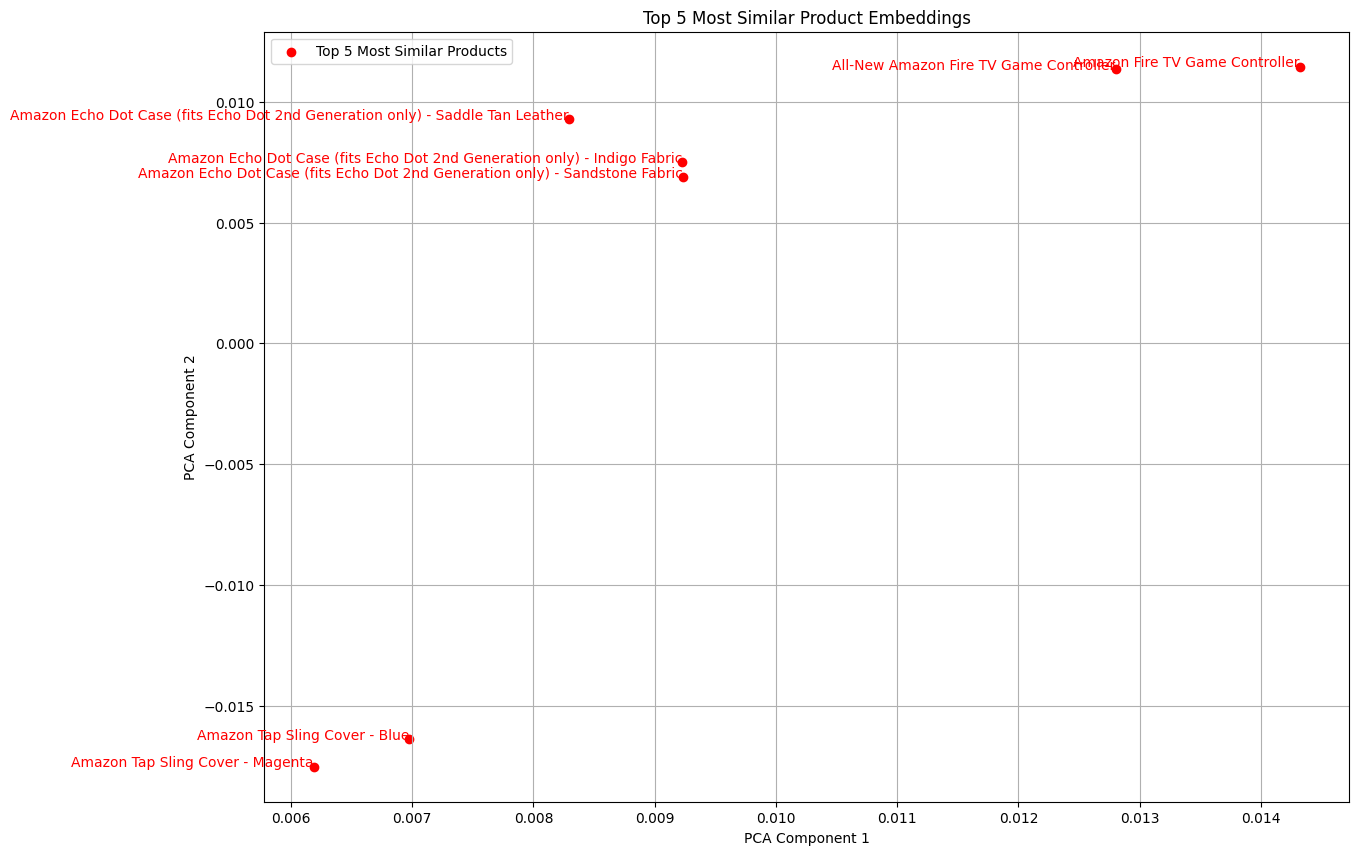

In [274]:
plt.figure(figsize=(14, 10))

plt.scatter(top_reduced_embeddings[:, 0], top_reduced_embeddings[:, 1], color='red', label=f'Top {top_n} Most Similar Products')

for i, name in enumerate(top_product_names):
    plt.text(top_reduced_embeddings[i, 0], top_reduced_embeddings[i, 1], name, fontsize=10, color='red', ha='right')

plt.title(f'Top {top_n} Most Similar Product Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

## Inference:
- Products with similar features or descriptions, such as the "Amazon Echo Dot Case" products, tend to cluster together in the embedding space.
- Products closer together in the visualization, like the "Amazon Echo Dot Case" products and the "Amazon Fire TV Game Controller" products, are more likely to be similar in terms of their attributes or characteristics.


## Program Logic:

The program begins by preprocessing product names, including cleaning and tokenizing them to create a Word2Vec model for generating embeddings. Each product name is then represented as a vector based on the average of its token embeddings. After removing duplicate product names, cosine similarity is calculated between the embeddings to determine how similar the products are to each other. The program then prompts the user to input the number of top similar products they want to display and identifies the top pairs based on similarity scores. For visualization, the program uses PCA to reduce the dimensionality of the embeddings to two dimensions and plots the top similar products on a scatter plot. The resulting graph highlights these products in red and annotates them with their names, avoiding the inclusion of less relevant unique products to focus solely on the most similar items, making the visualization clearer and more informative.








## Conclusion:

The five tasks present a systematic approach to analyzing Amazon product reviews. By starting with data preprocessing, applying sentiment analysis, extracting key topics, exploring temporal trends, and enhancing the recommendation system, we are able to derive actionable insights that can improve the customer experience. This flow forms a coherent narrative of turning raw textual data into strategic insights using **NLP, machine learning, and time series analysis**.

## Referneces:


1. Data Cleaning for Text Analysis: https://machinelearningmastery.com/natural-language-processing/   
2. A Deep Dive into NLP Tokenization and Encoding: https://campus.datacamp.com/courses/introduction-to-natural-language-processing-in-python/regular-expressions-word-tokenization?ex=5   
3. Edit Distance: https://www.geeksforgeeks.org/problems/edit-distance3702/1
4. N-gram Language Model Recommendations: https://www.askpython.com/python/examples/n-grams-python-nltk15. 
Flexiplehttps://flexiple.com/python/n-gram-pythonn6
5. N-Gram Language Modelling with NLTK: https://www.geeksforgeeks.org/n-gram-language-modelling-with-nltk7
Cosine Similarity:7https://www.datastax.com/guides/what-is-cosine-similarityp/

